# Выпускная квалификационная работа - Богословский Максим

Тема исследования: Прогнозирование конечных свойств новых материалов (композиционных материалов)

План работы:
1. Загрузка датасета


Импорт библиотек

In [1]:
#Импорт sklearn
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#Импорт numpy и pandas
import numpy as np
import pandas as pd
from pandas import read_excel, DataFrame, Series
from numpy.random import seed

#Импорт tensorflow
import tensorflow as tf
from tensorflow import keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation

#Импорт matplotlib
import matplotlib.pyplot as plt

#Импорт seaborn
import seaborn as sb

#Импорт plotly
import plotly.express as px

#Импорт keras
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

#Импорт scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

2022-12-09 18:44:54.075545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Загружаем датасет

In [20]:

X_bp = pd.read_excel('./data/X_bp.xlsx')#Загрузка первого датасета "X_bp.xlsx"
X_bp.shape#Проверка размерности

(1023, 11)

In [23]:

X_nup = pd.read_excel('./data/X_nup.xlsx')#Загрузка вторго датасета "X_nup.xlsx"
X_nup.shape#Проверка размерности

(1040, 4)

In [24]:

X_bp.drop(['Unnamed: 0'], axis=1, inplace=True)#Удаление столбца
X_bp.head()#Вывод шапки

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [25]:
X_nup.drop(['Unnamed: 0'], axis=1, inplace=True)#Удаление столбца
X_nup.head()#Вывод шапки

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,4.0,57.0
1,0.0,4.0,60.0
2,0.0,4.0,70.0
3,0.0,5.0,47.0
4,0.0,5.0,57.0


In [28]:
#Объединение, тип объединения INNER
data = X_bp.merge(X_nup, left_index = True, right_index = True, how = 'inner')
data.head().T

,0,1,2,3,4
Соотношение матрица-наполнитель,1.857143,1.857143,1.857143,1.857143,2.771331
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2030.000000,2030.000000
"модуль упругости, ГПа",738.736842,738.736842,738.736842,738.736842,753.000000
"Количество отвердителя, м.%",30.000000,50.000000,49.900000,129.000000,111.860000
"Содержание эпоксидных групп,%_2",22.267857,23.750000,33.000000,21.250000,22.267857
"Температура вспышки, С_2",100.000000,284.615385,284.615385,300.000000,284.615385
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000
"Модуль упругости при растяжении, ГПа",70.000000,70.000000,70.000000,70.000000,70.000000
"Прочность при растяжении, МПа",3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000


In [29]:
#Получили итоговой татасет размерностью: 13 столбцов и 1023 строки, так как левое соединение.
data.shape

(1023, 13)

Разведочный Анализ

In [31]:
data.info()#Получение информации о датасете (Пропуски отсутствуют, одинаковый тип данных)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [64]:
data.nunique()#Количество уникальных значений

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [62]:
data.iloc[:,10].nunique()#Количество уникальных значений "Угол нашивки" всего 2 занчения, можно заменить

2

In [66]:
#Приведение столбца к 0 и 1
data = data.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
data.iloc[:,10] = data.iloc[:,10].astype(int)

In [67]:
data.iloc[:,10]#Проверка корректности замены

0       0
1       0
2       0
3       0
4       0
       ..
1018    1
1019    1
1020    1
1021    1
1022    1
Name: Угол нашивки, град, Length: 1023, dtype: int64

In [68]:
data.describe()#Изучение параметров

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,0.500175,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,1.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1.000000,14.440522,103.988901


In [69]:
data.isnull().sum()#Пропуски отсутствуют, тепловую карту делать не будем

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [70]:
data.duplicated().sum()#Поиск дубликатов

0

In [71]:
data.corr(method = 'kendall')#Коэффициенты ранговой корреляции Кендалла

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,-0.003135,0.021247,0.001410,0.010180,-0.009480,-0.002060,-0.004157,0.011614,0.035145,-0.021395,0.022723,0.002788
"Плотность, кг/м3",-0.003135,1.000000,-0.008059,-0.021963,-0.007758,-0.019947,0.037302,-0.021151,-0.047426,-0.017079,-0.051525,-0.031220,0.052935
"модуль упругости, ГПа",0.021247,-0.008059,1.000000,0.022382,0.002351,0.021028,-0.000442,0.005458,0.022959,0.005169,-0.031695,-0.008305,0.049347
"Количество отвердителя, м.%",0.001410,-0.021963,0.022382,1.000000,0.000010,0.059034,0.033110,-0.043140,-0.046507,-0.003677,0.024690,0.006232,0.016607
"Содержание эпоксидных групп,%_2",0.010180,-0.007758,0.002351,0.000010,1.000000,-0.002170,-0.006859,0.041994,-0.013441,0.009756,0.004668,-0.004539,-0.021968
"Температура вспышки, С_2",-0.009480,-0.019947,0.021028,0.059034,-0.002170,1.000000,0.017196,0.016481,-0.019106,0.035313,0.017880,0.029552,0.005268
"Поверхностная плотность, г/м2",-0.002060,0.037302,-0.000442,0.033110,-0.006859,0.017196,1.000000,0.024051,-0.005099,-0.004446,0.045452,0.025514,-0.022320
"Модуль упругости при растяжении, ГПа",-0.004157,-0.021151,0.005458,-0.043140,0.041994,0.016481,0.024051,1.000000,-0.006599,0.034814,0.022431,-0.010024,-0.002600
"Прочность при растяжении, МПа",0.011614,-0.047426,0.022959,-0.046507,-0.013441,-0.019106,-0.005099,-0.006599,1.000000,0.013580,0.020609,-0.048049,0.009821
"Потребление смолы, г/м2",0.035145,-0.017079,0.005169,-0.003677,0.009756,0.035313,-0.004446,0.034814,0.013580,1.000000,-0.002402,0.005962,0.010792


In [72]:
data.corr(method ='pearson')#Коэффициенты корреляции Пирсона.


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


Визуализация

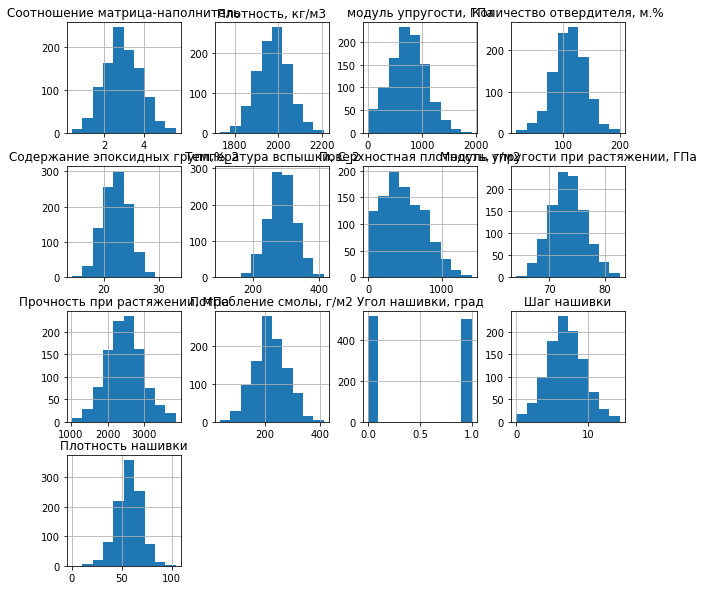

In [76]:
data.hist(figsize = (10,10))
plt.show()